In [1]:
import re
import csv
import os

In [2]:
def extract_data(file_content):
    pattern = r"Running Layer \d+\s*\nCompute cycles: (\d+)\s*\nStall cycles: (\d+)\s*\n\s*IFM Stall cycles: ([\d.]+)\s*\n\s*Filter Stall cycles: ([\d.]+)\s*\nOverall utilization: ([\d.]+)%\s*\nMAC Core Mapping efficiency: ([\d.]+)%\s*\nAverage IFMAP SRAM BW: ([\d.]+) bytes/cycle\s*\nAverage Filter SRAM BW: ([\d.]+) bytes/cycle\s*\nAverage OFMAP SRAM BW: ([\d.]+) bytes/cycle"

    result = re.findall(pattern, file_content)
    return result


In [3]:
csv_header = ["File", "Compute cycles", "Stall cycles", "IFM Stall cycles", "Filter Stall cycles", "Overall utilization", "MAC Core Mapping efficiency", "Average IFMAP SRAM BW", "Average Filter SRAM BW", "Average OFMAP SRAM BW"]


In [4]:
file = 'mm.log'
csv_data = []

with open(file, 'r') as f:
    content = f.read()
    data = extract_data(content)
    if data:
        for i, layer_data in enumerate(data):
            layer = f"Layer {i}"
            row_data = [layer] + list(layer_data)
            csv_data.append(row_data)

In [5]:
for layer in csv_data:
    for idx in range(len(layer)):
        if idx in [1, 2, 3, 4]:
            layer[idx] = int(float(layer[idx]))
        elif idx in [7, 8, 9]:
            layer[idx] = float(layer[idx])
        elif idx in [5, 6]:
            layer[idx] = float(layer[idx]) / 100
        
    layer.append(layer[1] * layer[7])
    layer.append(layer[1] * layer[8])

In [6]:
conv1x1 = [csv_data[0:10], csv_data[10: 20]]
conv3x3 = [csv_data[20:30], csv_data[30: 40]]


In [7]:
conv3x3[0][0]

['Layer 20',
 6117,
 4069,
 3967,
 102,
 0.3348,
 0.9995,
 31.456,
 12.174,
 1.378,
 192416.35199999998,
 74468.358]

In [8]:
import matplotlib.pyplot as plt

In [11]:
def plot_result(layer, index, param_name):
    x_axis_points = range(1,11)
    plt.bar(x_axis_points, [sub[index] for sub in layer[0]], width=0.4, align='center', label='IFM broadcast')
    plt.bar([x + 0.4 for x in x_axis_points], [sub[index] for sub in layer[1]], width=0.4, align='center', label='Filter broadcast')
    plt.xticks([x + 0.2 for x in x_axis_points], range(1,11))
    plt.legend()
    
    plt.title('Mapping Mode & Bandwidth Comparision')
    plt.xlabel('IFM Bandwidth (bank/32B)')
    plt.ylabel(param_name)
    
    plt.show()

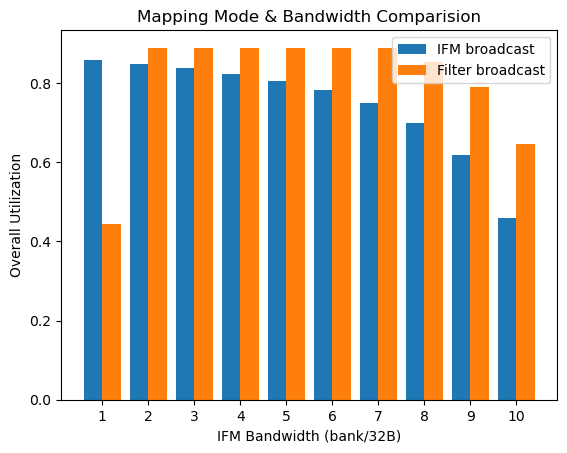

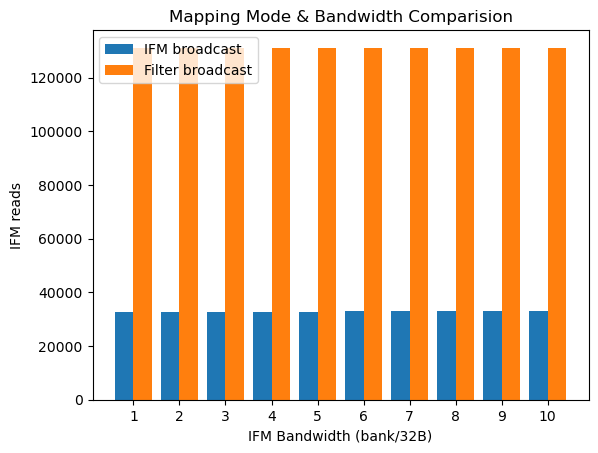

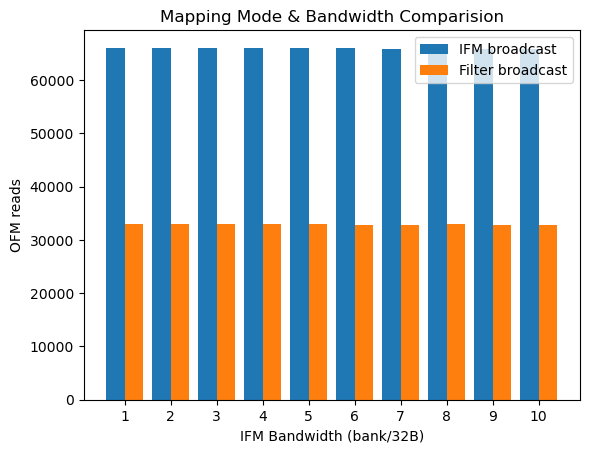

In [12]:
plot_result(conv1x1, 5, 'Overall Utilization')
plot_result(conv1x1, 10, 'IFM reads')
plot_result(conv1x1, 11, 'OFM reads')

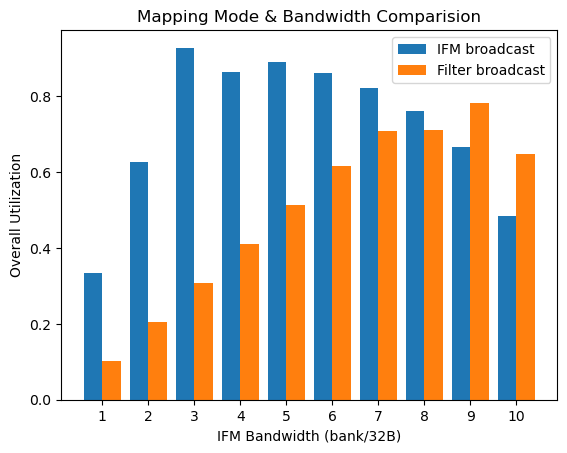

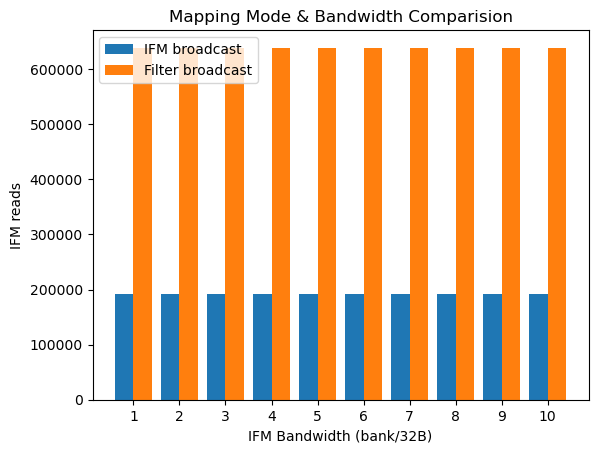

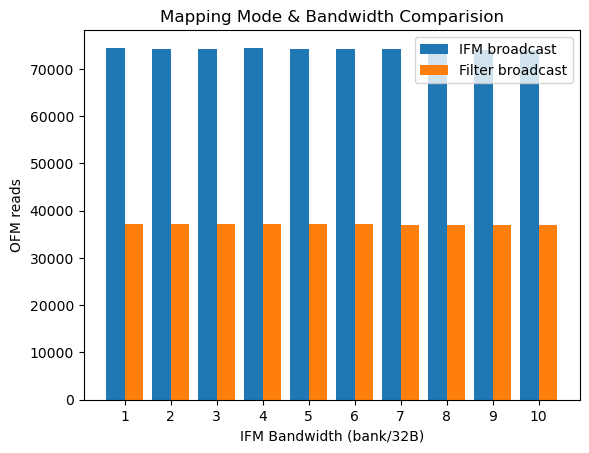

In [13]:
plot_result(conv3x3, 5, 'Overall Utilization')
plot_result(conv3x3, 10, 'IFM reads')
plot_result(conv3x3, 11, 'OFM reads')